# Online Bayesian Estimation of Gaussian Distribution
## Unknown mean and variance

The data comes sequentially and it is assumed that the data is from an Gaussian with unknown mean and variance. To predict the distribution of the next data given the current obervations, an online Bayesian algorithm is used which can handle the sequential nature of the problem with update every time after a new data is obseved. Also, the prior information can be intruduced if we have some reliable prior knowledge/domian knowledge of the data even no data is observed.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os  
import re
from scipy.stats import t,norm
%matplotlib inline

## Main Functions

In [2]:
def get_parameters_inital_prior(n_u,n_t,u_0,t_0):
        
    u_0 = u_0
    k_0 = n_u 
    a_0 = 0.5 * n_t 
    b_0 = 0.5 * n_t/t_0 
    
    return u_0,k_0,a_0,b_0

def get_parameters_prior(u_0,k_0,a_0,b_0,new_value,n):
    
    u = new_value
    
    u_n = (k_0 * u_0 + n * u)/(k_0 + n)
    k_n = k_0 + n
    a_n = a_0 + n/2
    b_n = b_0 + (k_0 * n * (u - u_0)**2)/(2 * (k_0 + n))
    
    return u_n,k_n,a_n,b_n

def get_parameters_t_distribution(u_n,k_n,a_n,b_n):
    v = 2 * a_n
    u = u_n
    scale = ((a_n * k_n)/(b_n * (k_n + 1)))**(-0.5)
    
    return v,u,scale

## Prior information (predefined, our prior estimation without any data)

In [3]:
#number of pseudo samples based on which our prior estimation of the mean is estimated
n_u = 5
#number of pseudo samples based on which our prior estimation of the precision is estimated
n_t = 50
#prior estimation of the mean
u_0 = 74
#prior estimation of the variance and then convert to presicion
var_0 = 100

t_0 = 1/var_0

In [4]:
u_0,k_0,a_0,b_0 = get_parameters_inital_prior(n_u,n_t,u_0,t_0)
v_0,u_0,scale_0 = get_parameters_t_distribution(u_0,k_0,a_0,b_0)

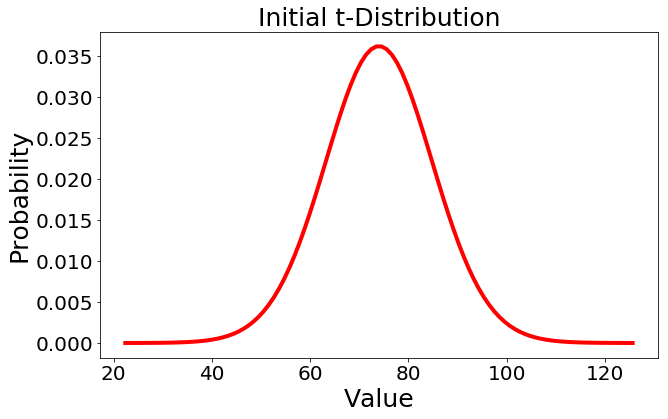

In [5]:
x = np.linspace(t.ppf(0.00001, df = v_0,loc = u_0, scale = scale_0),t.ppf(0.99999,df = v_0,loc = u_0, scale = scale_0), 100)

plt.figure(figsize = (10,6))
plt.plot(x, t.pdf(x, df = v_0, loc = u_0, scale = scale_0),c = 'r', lw=4, alpha=1)
plt.title('Initial t-Distribution',fontsize = 25)
plt.xlabel('Value',fontsize = 25)
plt.ylabel('Probability',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [6]:
#if we want to know the percentiles, use the function of t.ppf
Percentiles_50 = t.ppf(0.5, df = v_0, loc = u_0, scale = scale_0)
Percentiles_99 = t.ppf(0.99, df = v_0, loc = u_0, scale = scale_0)
print("The 50% percentile is:",Percentiles_50)
print("The 99% percentile is:",Percentiles_99)

The 50% percentile is: 74.0
The 99% percentile is: 100.32652482543591


## Example sequential data

In [7]:
#This is an example of the sequential estimation using some arbitrary data
data = np.array([38,48,45,32,42,43,58,54,39,50,54,53,39,46,44,52,46,43,40,46,45,24,47,47,58])
N = len(data)

#record the parameters for the t-distribution during the update
v_list = []
u_list = []
scale_list = []

#record the 50% and 99% percentile
Percentile_50_list = []
Percentile_99_list = []

#Assume the data comes one by one
for i in range(N):
    #get the new data
    new_value = data[i]
    n = 1
    
    #update the parameters according to the new data
    u_n,k_n,a_n,b_n = get_parameters_prior(u_0,k_0,a_0,b_0,new_value,n)
    v,u,scale = get_parameters_t_distribution(u_n,k_n,a_n,b_n)

    v_list.append(v)
    u_list.append(u)
    scale_list.append(scale)
    
    percentile_50 = t.ppf(0.50, df = v, loc = u, scale = scale)
    Percentile_50_list.append(percentile_50)
    
    percentile_99 = t.ppf(0.99, df = v, loc = u, scale = scale)
    Percentile_99_list.append(percentile_99)
    #the posterior becomes the prior for the next data
    u_0 = u_n
    k_0 = k_n
    a_0 = a_n
    b_0 = b_n

## Some visualizations

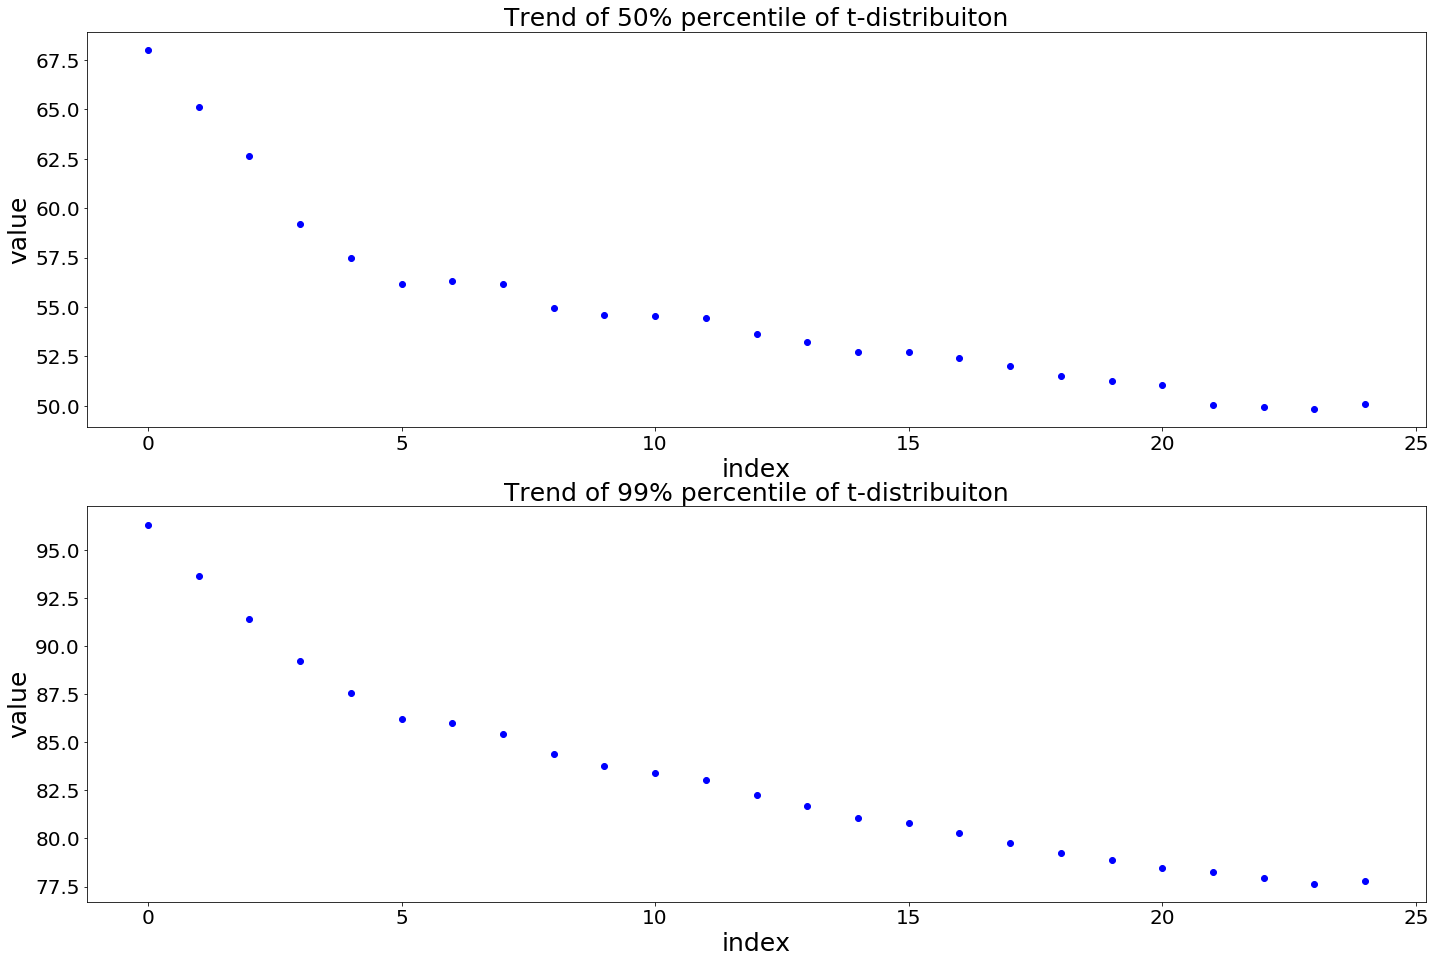

In [8]:
plt.figure(figsize = (24,16))
plt.subplot(211)
plt.scatter(np.arange(N),Percentile_50_list,c = 'b')
plt.title('Trend of 50% percentile of t-distribuiton',fontsize = 25)
plt.xlabel('index',fontsize = 25)
plt.ylabel('value',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.subplot(212)
plt.scatter(np.arange(N),Percentile_99_list,c = 'b')
plt.title('Trend of 99% percentile of t-distribuiton',fontsize = 25)
plt.xlabel('index',fontsize = 25)
plt.ylabel('value',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

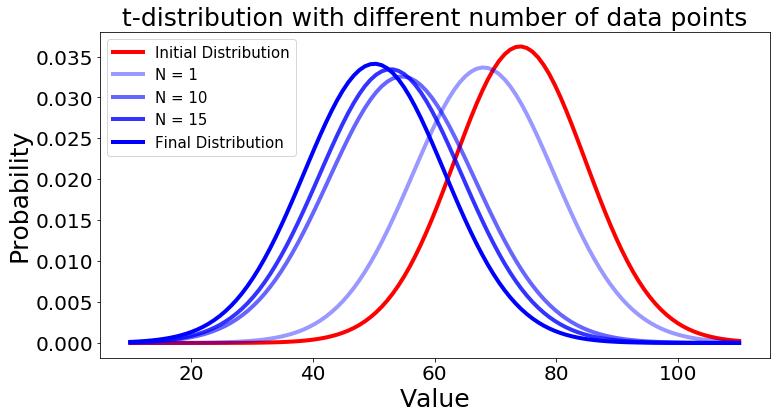

In [9]:
n_u = 5
n_t = 50
u_0 = 74
var_0 = 100
t_0 = 1/var_0
u_0,k_0,a_0,b_0 = get_parameters_inital_prior(n_u,n_t,u_0,t_0)
v_0,u_0,scale_0 = get_parameters_t_distribution(u_0,k_0,a_0,b_0)

x = np.linspace(10,110,110)

plt.figure(figsize = (12,6))
plt.plot(x, t.pdf(x, df = v_0, loc = u_0, scale = scale_0),c = 'r', lw=4, alpha=1, label='Initial Distribution')
plt.plot(x, t.pdf(x, df = v_list[0], loc = u_list[0], scale = scale_list[0]), c = 'b', lw=4, alpha=0.4, label='N = 1')
plt.plot(x, t.pdf(x, df = v_list[9], loc = u_list[9], scale = scale_list[9]), c = 'b', lw=4, alpha=0.6, label='N = 10')
plt.plot(x, t.pdf(x, df = v_list[14], loc = u_list[14], scale = scale_list[14]), c = 'b', lw=4, alpha=0.8, label='N = 15')
plt.plot(x, t.pdf(x, df = v_list[-1], loc = u_list[-1], scale = scale_list[-1]), c = 'b', lw=4, alpha=1, label='Final Distribution')
plt.title('t-distribution with different number of data points',fontsize = 25)
plt.xlabel('Value',fontsize = 25)
plt.ylabel('Probability',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

